# Chapter 4. Training Models

In this chapter, we will work with a linear model and train it using the closed-form solution and several types of gradient descent.
Then, we will graduate to a polynomial and look for overfitting.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5), facecolor='white')

In [72]:
%matplotlib inline

## Linear regression

### The normal equation

There is a closed form solution for finding the line that minimizes the RMSE of data to a single response variable.

In [73]:
X = 2 * np.random.rand(100, 1)
X[1:5]

array([[1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ]])

In [74]:
y = 4 + 3 * X + np.random.randn(100, 1)
y[1:5]

array([[9.19196269],
       [8.0822427 ],
       [5.73305541],
       [8.03018099]])

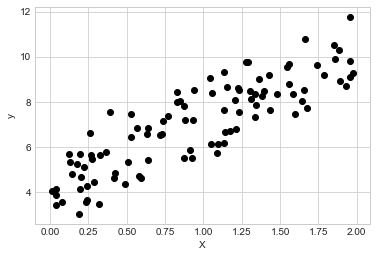

In [75]:
plt.scatter(X, y, color='black')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

We will first compute the exact minimization of RMSE (really, MSE) by solving the *Normal Equation*, below.

$$
\hat{\theta} = (\boldsymbol{\text{X}}^T \cdot \text{X})^{-1} \cdot \text{X}^T \cdot \text{y}
$$

In [76]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.22215108],
       [2.96846751]])

These values can be used for making predictions given new data points.

In [77]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.22215108],
       [10.1590861 ]])

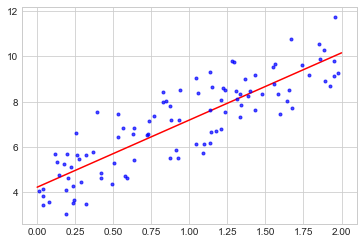

In [78]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.', alpha=0.7)
plt.show()

This, of course, can be more easily (and safely) done with Scikit-Learn.

In [79]:
from sklearn.linear_model import LinearRegression

# Fit an Scikit-Learn linear regression model.
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# The intercept of the fit model.
lin_reg.intercept_

array([4.22215108])

In [80]:
lin_reg.coef_

array([[2.96846751]])

In [81]:
# Make predictions for new data.
lin_reg.predict(X_new)

array([[ 4.22215108],
       [10.1590861 ]])

### Gradient Descent

There are other ways to fit a linear model that are better suited for many features.

The main idea behind *gradient descent* is to tweak parameters towards minimizing some objective function.
An important parameter is the *learning rate* which determines the step size of the optimization.
Also, there may be local minima that trap the optimization.

It is generally good advice to have scaled features for gradient descent such that all dimensions are related in scale.

#### Batch gradient descent

The find the best direction to move, the partial derivative must be found for each dimension.
This is done manually below, but of course it can be done quickly using the appropriate Scikit-Learn solver.
The equation for the partial derivative is below:

$$
\nabla_{\theta}\text{MSE}(\theta) =
\begin{pmatrix}
    {\frac{\partial}{\partial \theta_0}\text{MSE}(\theta)} \\
    {\frac{\partial}{\partial \theta_1}\text{MSE}(\theta)} \\
    {...} \\
    {\frac{\partial}{\partial \theta_n}\text{MSE}(\theta)} \\
    \end{pmatrix} =
\frac{2}{m}\text{X}^T \cdot (\text{X} \cdot \theta -\text{y})
$$

In [82]:
eta = 0.1  # learning rate
n_iterations = 1000  # number of iterations of gradient descent
m=X.shape[0]  # number of data points

theta = np.random.randn(2, 1) # randomly initialize theta

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.22215108],
       [2.96846751]])

The see the effect of the learning rate, I built a function that plots the line generated at each step.

In [83]:

def get_styling_details(current_iteration, max_iterations):
    """Get the styling details for the line plot depending on the iteration."""
    if current_iteration == 0:
        return ('r--', 1)
    elif current_iteration == max_iterations:
        return ('b-', 1.0)
    elif current_iteration < 10:
        return ('b--', 0.3)
    else:
        return ('k-', 0.0)


def plot_current_line(theta, current_iteration, max_iterations):
    """Plot the current line."""
    style, alpha = get_styling_details(current_iteration, max_iterations)
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, style, alpha=alpha)


def plot_gradient_descent(theta, eta):
    """Perform gradient descent and plot the intermediates."""
    
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        if iteration < 10 or iteration == n_iterations-1 :
            plot_current_line(theta, iteration, n_iterations-1)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
    
    plt.xlabel('$X$', fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(f'$\eta = {eta}$', fontsize=16)

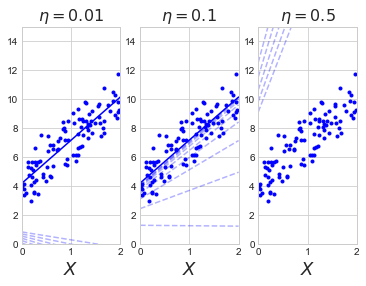

In [84]:
random_initial_theta = np.random.randn(2, 1)
fig = plt.figure()
plt.subplot(1, 3, 1)
plot_gradient_descent(random_initial_theta, 0.01)
plt.subplot(1, 3, 2)
plot_gradient_descent(random_initial_theta, 0.1)
plt.subplot(1, 3, 3)
plot_gradient_descent(random_initial_theta, 0.5)